In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [3]:
import subprocess
assert u'lsst' in subprocess.check_output(['groups']).decode().split(), 'You need to be in the `lsst` group for this notebook to work'

In [4]:
import GCRCatalogs

## check version
print('GCRCatalogs =', GCRCatalogs.__version__, '|' ,'GCR =', GCRCatalogs.GCR.__version__)

('GCRCatalogs =', '0.6.14', '|', 'GCR =', '0.6.2')


In [6]:
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [7]:
gc = GCRCatalogs.load_catalog('protoDC2')

In [8]:
print('\n'.join(sorted(gc.list_all_native_quantities())[:]))

LSST_filters/diskLuminositiesStellar:LSST_g:observed
LSST_filters/diskLuminositiesStellar:LSST_g:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_g:rest
LSST_filters/diskLuminositiesStellar:LSST_g:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:observed
LSST_filters/diskLuminositiesStellar:LSST_i:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_i:rest
LSST_filters/diskLuminositiesStellar:LSST_i:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_r:observed
LSST_filters/diskLuminositiesStellar:LSST_r:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_r:rest
LSST_filters/diskLuminositiesStellar:LSST_r:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_u:observed
LSST_filters/diskLuminositiesStellar:LSST_u:observed:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_u:rest
LSST_filters/diskLuminositiesStellar:LSST_u:rest:dustAtlas
LSST_filters/diskLuminositiesStellar:LSST_y:observed
LSST_filters/diskLuminositiesStellar:LSST_y:observe

In [9]:
data = gc.get_quantities(['LSST_filters/magnitude:LSST_i:observed:dustAtlas','redshift', 'emissionLines/totalLineLuminosity:balmerAlpha6563:rest','emissionLines/totalLineLuminosity:balmerBeta4861:rest', 'emissionLines/totalLineLuminosity:nitrogenII6584:rest', 'emissionLines/totalLineLuminosity:oxygenIII4959:rest', 'emissionLines/totalLineLuminosity:oxygenIII5007:rest','emissionLines/totalLineLuminosity:sulfurII6716:rest','emissionLines/totalLineLuminosity:sulfurII6731:rest'])
sz = data['redshift']
i = data['LSST_filters/magnitude:LSST_i:observed:dustAtlas']
Halpha = data['emissionLines/totalLineLuminosity:balmerAlpha6563:rest']
Hbeta = data['emissionLines/totalLineLuminosity:balmerBeta4861:rest']
NII6584 = data['emissionLines/totalLineLuminosity:nitrogenII6584:rest']
OIII5007 = data['emissionLines/totalLineLuminosity:oxygenIII5007:rest']
OIII4959 = data['emissionLines/totalLineLuminosity:oxygenIII4959:rest']
SII6716 = data['emissionLines/totalLineLuminosity:sulfurII6716:rest']
SII6731 = data['emissionLines/totalLineLuminosity:sulfurII6731:rest']
SIItot = SII6716 + SII6731

In [11]:
n2halpha = np.log10(NII6584/Halpha)
o3hbeta = np.log10(OIII5007/Hbeta)
print (n2halpha[0:5])
print (o3hbeta[0:5])

/global/common/cori/software/python/2.7-anaconda-4.4/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.
/global/common/cori/software/python/2.7-anaconda-4.4/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


[-1.97079961 -1.62479421 -1.51495532 -1.53951541 -1.42783884]
[ 0.46924056  0.55137504  0.46494313  0.49218961  0.24526392]


In [12]:
xvec = np.arange(-3.,0.001,0.01)
n2kewley = 0.61/xvec+1.19

In [14]:
mask = (i<25.3)
n2halphagold = n2halpha[mask]
o3hbetagold = o3hbeta[mask]

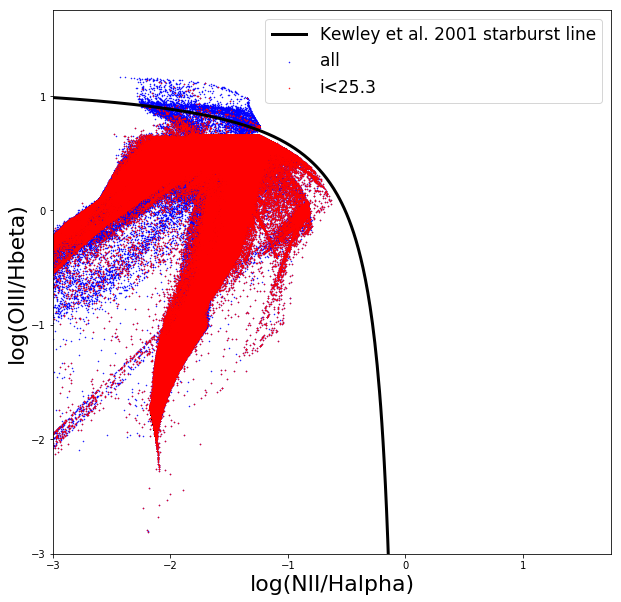

In [16]:
fig = plt.figure(figsize=(10,10))
plt.scatter(n2halpha,o3hbeta,marker='.',s=1,c='b',label="all")
plt.scatter(n2halphagold,o3hbetagold,marker='.',s=1,c='r',label="i<25.3")
plt.xlabel('log(NII/Halpha)',fontsize=22)
plt.ylabel('log(OIII/Hbeta)',fontsize=22)
plt.xlim((-3,1.75))
plt.ylim((-3,1.75))
plt.plot(xvec,n2kewley,color='k',lw=3,label = "Kewley et al. 2001 starburst line")
#plt.plot([0.,2.6],[26.8,26.8],color='r',linestyle='--',label = "i<26.8")
plt.legend(loc="upper right",fontsize=17)
plt.savefig("BPT_NII.jpg",format='jpg')

In [19]:
s2halpha = np.log10(SIItot/Halpha)
print (s2halpha[0:5])

s2kewley = 0.72/xvec+1.30

/global/common/cori/software/python/2.7-anaconda-4.4/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


[-1.87950803 -1.60110234 -1.48986814 -1.51481181 -1.44069827]


In [18]:
s2halphagold = s2halpha[mask]

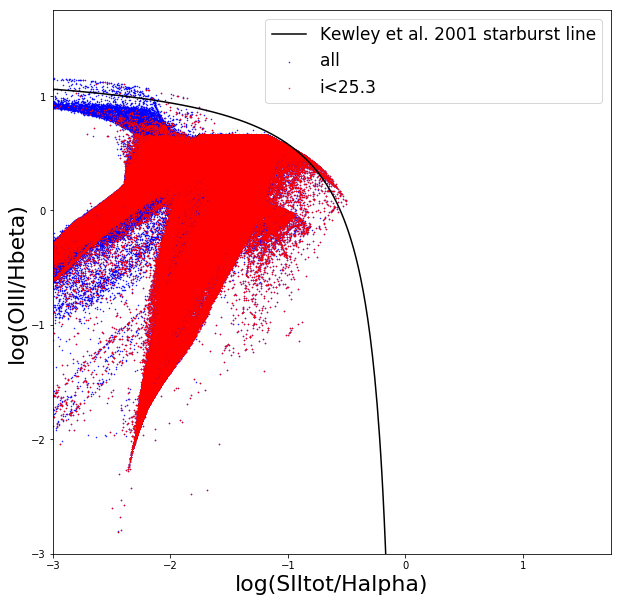

In [25]:
fig = plt.figure(figsize=(10,10))
plt.scatter(s2halpha,o3hbeta,marker='.',s=1,c='b',label="all")
plt.scatter(s2halphagold,o3hbetagold,marker='.',s=1,c='r',label="i<25.3")
plt.xlabel('log(SIItot/Halpha)',fontsize=22)
plt.ylabel('log(OIII/Hbeta)',fontsize=22)
plt.xlim((-3,1.75))
plt.ylim((-3,1.75))
plt.plot(xvec,s2kewley,color='k',label = "Kewley et al. 2001 starburst line")
#plt.plot([0.,2.6],[26.8,26.8],color='r',linestyle='--',label = "i<26.8")
plt.legend(loc="upper right",fontsize=17)
plt.savefig("BPT_SII.jpg",format='jpg')

In [23]:
o3ratio = np.log10(OIII5007/OIII4959)
print (o3ratio[0:5])

o3_31 = np.ones(len(xvec))*np.log10(3.)

/global/common/cori/software/python/2.7-anaconda-4.4/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


[ 0.4789415   0.47884879  0.47891521  0.47888688  0.47887913]


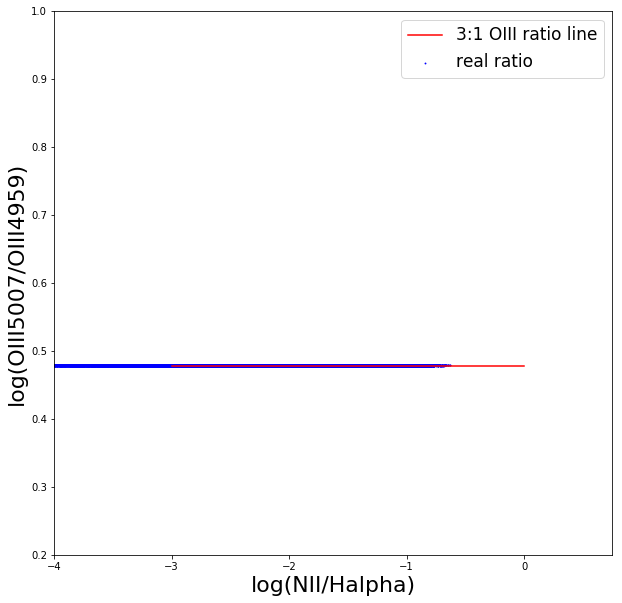

In [24]:
fig = plt.figure(figsize=(10,10))
plt.scatter(n2halpha,o3ratio,marker='.',s=3,c='b',label="real ratio")
plt.xlabel('log(NII/Halpha)',fontsize=22)
plt.ylabel('log(OIII5007/OIII4959)',fontsize=22)
plt.xlim((-4,.75))
plt.ylim((0.2,1.))
plt.plot(xvec,o3_31,color='r',label = "3:1 OIII ratio line")
plt.legend(loc="upper right",fontsize=17)
plt.savefig("BPT_OIIIration.jpg",format='jpg')